# **Convolutional Neural Network for Drowsiness Detection from EEG (electroencephalogram) signals**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import os
import scipy.io as sio

In [ ]:

mat_data = sio.loadmat('/content/drive/MyDrive/Drowsiness/dataset.mat')
mat_data

{'__header__': b'MATLAB 5.0 MAT-file, Platform: PCWIN64, Created on: Thu Dec 12 16:15:31 2019',
 '__version__': '1.0',
 '__globals__': [],
 'EEGsample': array([[[ 4.08097622e+00,  5.36373657e+00,  2.16892286e+00, ...,
          -2.43467111e+00, -1.08033326e+01, -4.06570287e+00],
         [ 3.78602291e+00,  6.18806022e+00,  1.72710622e+00, ...,
          -2.23788269e+00, -1.08040545e+01, -3.16985550e+00],
         [ 8.34680437e+00,  8.69160090e+00, -1.09056499e-02, ...,
           2.30521997e+00, -1.33921422e+01, -5.27739673e+00],
         ...,
         [ 1.52884814e+00,  7.93795880e-01, -1.45126572e+00, ...,
          -1.22710349e+00, -5.26310889e+00, -1.22684549e+00],
         [-1.19949821e+00, -1.54496214e+00, -4.31985930e+00, ...,
          -5.32550694e+00, -5.48814272e+00, -1.57636907e+00],
         [ 1.59400945e+00,  1.90051435e+00, -4.64426331e+00, ...,
          -3.48251971e+00, -2.09547756e+00,  4.01980667e+00]],
 
        [[ 5.10435476e+00,  2.66309990e-01,  3.92736106e+00, ..

In [ ]:
EEG_Sample = mat_data['EEGsample']
SubIndex = mat_data['subindex']
SubState = mat_data['substate']
EEG_Sample.shape

(2022, 30, 384)

In [ ]:

Data = EEG_Sample
Label = SubState
np.save('/content/drive/MyDrive/Drowsiness/DrowD.npy', Data)
np.save('/content/drive/MyDrive/Drowsiness/label.npy', Label)

# **Data Reading**

In [ ]:
DrowD = np.load('/content/drive/MyDrive/Drowsiness/DrowD.npy')
label = np.load('/content/drive/MyDrive/Drowsiness/label.npy')
print("Shape of the Data: ", DrowD.shape)
print("Shape of the Label: ", label.shape)

Shape of the Data:  (2022, 30, 384)
Shape of the Label:  (2022, 1)


# **Pre-processing**

In [ ]:
Data = [lst[:] for lst in DrowD]

Ndata=[]
for i in  range(len(Data)):
    std=np.std(Data[i],axis=1)
    mean=np.mean(Data[i],axis=1)
    Data[i]=(Data[i].transpose()-mean.transpose()).transpose()
    Data[i]=(Data[i].transpose()/std.transpose()).transpose()
    Ndata.append(Data[i])

Ndata = np.array(Ndata)
# for i in range(len(Ndata)):
#     print(np.array(Ndata[i]).shape)

In [ ]:
# import scipy.io
# import numpy as np

# # mat_data = scipy.io.loadmat('/Users/kamakshiojha/Documents/Drowsiness_detection/dataset.mat')

# EEGsample_data = Ndata #mat_data['EEGsample']
# segment_length = 1000
# overlap = 0.5
# num_samples = len(EEGsample_data)
# num_segments = int(np.floor((num_samples - segment_length) / (segment_length * (1 - overlap)))) + 1

# segmented_data = []
# for i in range(num_segments):
#     start_idx = int(i * segment_length * (1 - overlap))
#     end_idx = start_idx + segment_length
#     segment = EEGsample_data[start_idx:end_idx]
#     segmented_data.append(segment)

# segmented_data = np.array(segmented_data)


In [ ]:
# np.shape(Ndata[0])

# **Segmentation of Data**

In [ ]:
#np.array(img_data_list).shape
segmented_data=[]
new_label = []
winSize=128*1 # Size of data point (data of 8 sec)
stride=128*1  # sliding window with length winSize and stride 1 sec


for j in range(len(Ndata)):
    count=0
    for i in range(0,np.shape(Ndata[j])[1]-winSize,stride):
        count+=1
        if len(np.shape(segmented_data))>1:
            segmented_data=np.dstack((segmented_data,Ndata[j][:,i:i+winSize]))
            new_label.append(label[j])
        else:
            segmented_data=np.reshape(Ndata[j][:,i:i+winSize],(30,np.shape(Ndata[j][:,i:i+winSize])[1],1))
            new_label.append(label[j])
    print(count)

2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2


In [ ]:
np.shape(segmented_data)
# np.shape(new_label) (2022, 30, 384)

(30, 128, 4044)

In [ ]:
# # np.array(windowing_SZ_data).shape
# segmented_data1 = np.transpose(segmented_data,(2,0,1))
# np.save('/Users/kamakshiojha/Documents/segmented_data.npy',np.array(segmented_data))
# np.save('/Users/kamakshiojha/Documents/new_label.npy',np.array(new_label))

In [ ]:
new_Data = [lst[:] for lst in segmented_data]

N_data=[]
for i in  range(len(new_Data)):
    std=np.std(new_Data[i],axis=1)
    mean=np.mean(new_Data[i],axis=1)
    new_Data[i]=(new_Data[i].transpose()-mean.transpose()).transpose()
    new_Data[i]=(new_Data[i].transpose()/std.transpose()).transpose()
    N_data.append(new_Data[i])

N_data = np.array(N_data)
# for i in range(len(Ndata)):
#     print(np.array(Ndata[i]).shape)

# **Changing to Expected Shape**

In [ ]:
N_data1 = np.transpose(N_data,(2,0,1)) #Ndata
N_data1.shape

(4044, 30, 128)

# **Splitting the Data into Training and Testing**

In [ ]:
from tensorflow.keras.utils import to_categorical
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

num_classes = 2
Y = to_categorical(new_label, num_classes) #label
x,y = shuffle(N_data1, Y, random_state = 42) # Ndata
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.05, random_state = 20)
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (3841, 30, 128)
Shape of X_test: (203, 30, 128)
Shape of y_train: (3841, 2)
Shape of y_test: (203, 2)


# **Attention Mechanisms : CBAM**

The idea of Attention Mechanisms was first popularly introduced in the domain of Natural Language Processing (NLP) in the NeurIPS 2017 paper by Google Brain, titled "Attention Is All You Need".


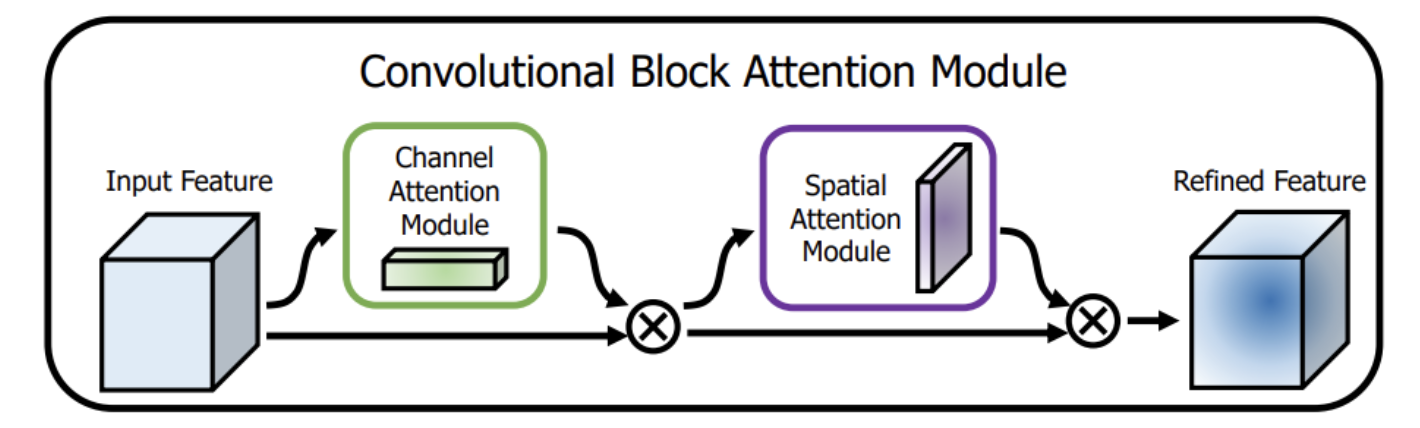



CBAM contains two sequential sub-modules called the Channel Attention Module (CAM) and the Spatial Attention Module (SAM), which are applied in that particular order.

# **Spatial Attention Module (SAM)**

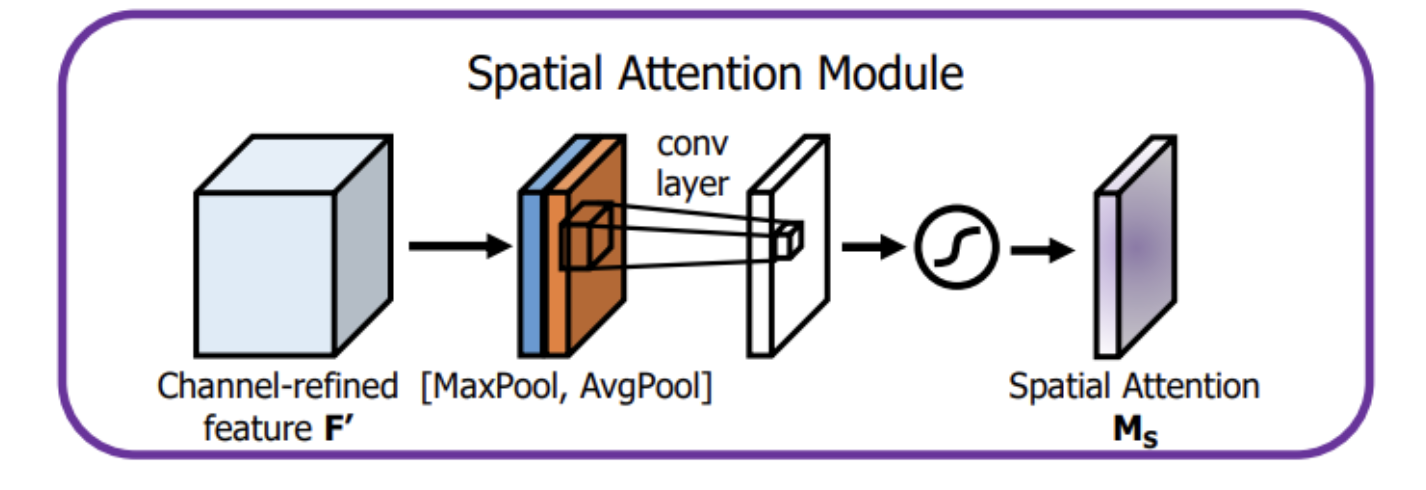


# **Channel Attention Module (CAM)**

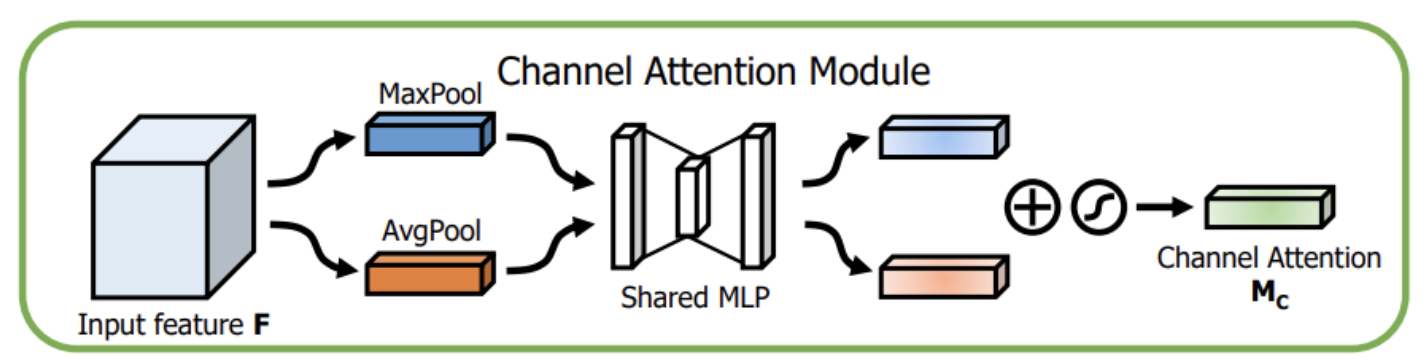

In [ ]:
def cbam_block(cbam_feature, ratio=8):
    cbam_feature = channel_attention(cbam_feature, ratio)
    cbam_feature = spatial_attention(cbam_feature)
    return cbam_feature

def channel_attention(input_feature, ratio=8):
    H, W, C = map(int, input_feature.get_shape()[1:])
    channel = C

    shared_layer_one = Dense(channel//ratio,
                             kernel_initializer='he_normal',
                             use_bias=True,
                             bias_initializer='zeros')
    shared_layer_two = Dense(channel,
                             kernel_initializer='he_normal',
                             use_bias=True,
                             bias_initializer='zeros')

    avg_pool = GlobalAveragePooling2D()(input_feature)
    avg_pool = Reshape((1,1,channel))(avg_pool)
    #assert avg_pool._keras_shape[1:] == (1,1,channel)
    avg_pool = shared_layer_one(avg_pool)
    #assert avg_pool._keras_shape[1:] == (1,1,channel//ratio)
    avg_pool = shared_layer_two(avg_pool)
    #assert avg_pool._keras_shape[1:] == (1,1,channel)

    max_pool = GlobalMaxPooling2D()(input_feature)
    max_pool = Reshape((1,1,channel))(max_pool)
    #assert max_pool._keras_shape[1:] == (1,1,channel)
    max_pool = shared_layer_one(max_pool)
    #assert max_pool._keras_shape[1:] == (1,1,channel//ratio)
    max_pool = shared_layer_two(max_pool)
    #assert max_pool._keras_shape[1:] == (1,1,channel)

    cbam_feature = Add()([avg_pool,max_pool])
    cbam_feature = Activation('sigmoid')(cbam_feature)

    if K.image_data_format() == "channels_first":
        cbam_feature = Permute((3, 1, 2))(cbam_feature)

    return multiply([input_feature, cbam_feature])

def spatial_attention(input_feature):
    kernel_size = 7
    H, W, C = map(int, input_feature.get_shape()[1:])
    if K.image_data_format() == "channels_first":
        channel = C
        cbam_feature = Permute((2,3,1))(input_feature)
    else:
        channel = C
        cbam_feature = input_feature

    avg_pool = Lambda(lambda x: K.mean(x, axis=3, keepdims=True))(cbam_feature)
    #assert avg_pool._keras_shape[-1] == 1
    max_pool = Lambda(lambda x: K.max(x, axis=3, keepdims=True))(cbam_feature)
    #assert max_pool._keras_shape[-1] == 1
    concat = Concatenate(axis=3)([avg_pool, max_pool])
    #assert concat._keras_shape[-1] == 2
    cbam_feature = Conv2D(filters = 1,
                    kernel_size=kernel_size,
                    strides=1,
                    padding='same',
                    activation='sigmoid',
                    kernel_initializer='he_normal',
                    use_bias=False)(concat)
    #assert cbam_feature._keras_shape[-1] == 1

    if K.image_data_format() == "channels_first":
        cbam_feature = Permute((3, 1, 2))(cbam_feature)

    return multiply([input_feature, cbam_feature])

# **Import Library**

In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, Add, Multiply, Concatenate, AveragePooling2D, Flatten, Reshape,DepthwiseConv2D
from tensorflow.keras.layers import SeparableConv2D, MaxPooling2D, Dense, GlobalAveragePooling2D,GlobalMaxPooling2D,Activation,multiply,Lambda
import keras
from tensorflow.keras import backend as K

In [ ]:


# visible = Input((30, 384, 1)) #128
# x1 = Conv2D(filters = 32, kernel_size = (1,3), strides = 1, activation = "relu")(visible)
# # x1 = MaxPooling2D(pool_size=(1, 2), strides=(1, 2))(x1)
# x1 = Conv2D(filters = 32, kernel_size = (1,3), activation = "relu")(x1)
# m1 = Conv2D(filters = 32, dilation_rate = 1, kernel_size = (1,3), padding = "same",  activation = "relu")(x1)
# a1 = Add()([x1, m1])
# m2 = Conv2D(filters = 32, dilation_rate = 2, kernel_size = (1,3), padding = "same",  activation = "relu")(a1)
# a2 = Add()([x1, m1, m2])
# m3 = Conv2D(filters = 32, dilation_rate = 3, kernel_size = (1,3), padding = "same",  activation = "relu")(a2)
# a3 = Add()([x1, m1, m2, m3])
# m4 = Conv2D(filters = 32, dilation_rate = 4, kernel_size = (1,3), padding = "same",  activation = "relu")(a3)
# c2 = Concatenate()([m1, m2, m3, m4])
# c2 = Conv2D(filters = 32, kernel_size = (1,1), activation = "relu")(m4)
# a4 = Add()([x1, c2])
# # g1 = GlobalAveragePooling2D()(a4)
# c1 = cbam_block(a4,256)



# x2 = Conv2D(filters = 64, kernel_size = (1,3), strides = 1, activation = "relu")(c1)
# x2 = MaxPooling2D(pool_size=(1, 2), strides=(1, 2))(x2)
# x2 = Conv2D(filters = 64, kernel_size = (1,1), activation = "relu")(x2)
# m1 = Conv2D(filters = 64, dilation_rate = 1, kernel_size = (1,3), padding = "same",  activation = "relu")(x2)
# a1 = Add()([x2, m1])
# m2 = Conv2D(filters = 64, dilation_rate = 2, kernel_size = (1,3), padding = "same",  activation = "relu")(a1)
# a2 = Add()([x2, m1, m2])
# m3 = Conv2D(filters = 64, dilation_rate = 3, kernel_size = (1,3), padding = "same",  activation = "relu")(a2)
# a3 = Add()([x2, m1, m2, m3])
# m4 = Conv2D(filters = 64, dilation_rate = 4, kernel_size = (1,3), padding = "same",  activation = "relu")(a3)
# c2 = Concatenate()([m1, m2, m3, m4])
# c2 = Conv2D(filters = 64, kernel_size = (1,1), activation = "relu")(m4)
# a4 = Add()([x2, c2])
# # g2 = GlobalAveragePooling2D()(a4)
# c1 = cbam_block(a4,256)

# x3 = Conv2D(filters = 128, kernel_size = (1,3), strides = 1, activation = "relu")(c1)
# x3 = MaxPooling2D(pool_size=(1, 2), strides=(1, 2))(x3)
# x3 = Conv2D(filters = 128, kernel_size = (1,1), activation = "relu")(x3)
# m1 = Conv2D(filters = 128, dilation_rate = 1, kernel_size = (1,3), padding = "same",  activation = "relu")(x3)
# a1 = Add()([x3, m1])
# m2 = Conv2D(filters = 128, dilation_rate = 2, kernel_size = (1,3), padding = "same",  activation = "relu")(a1)
# a2 = Add()([x3, m1, m2])
# m3 = Conv2D(filters = 128, dilation_rate = 3, kernel_size = (1,3), padding = "same",  activation = "relu")(a2)
# a3 = Add()([x3, m1, m2, m3])
# m4 = Conv2D(filters = 128, dilation_rate = 4, kernel_size = (1,3), padding = "same",  activation = "relu")(a3)
# c2 = Concatenate()([m1, m2, m3, m4])
# c2 = Conv2D(filters = 128, kernel_size = (1,1), activation = "relu")(m4)
# a4 = Add()([x3, c2])

# c1 = cbam_block(a4,256)
# g3 = GlobalAveragePooling2D()(c1)

# # x4 = Conv2D(filters = 128, kernel_size = (1,3), strides = 1, activation = "relu")(x3)
# # x4 = MaxPooling2D(pool_size=(1, 2), strides=(1, 2))(x4)
# # x4 = Conv2D(filters = 128, kernel_size = (1,1), activation = "relu")(x4)
# # m1 = Conv2D(filters = 128, dilation_rate = 1, kernel_size = (1,3), padding = "same",  activation = "relu")(x4)
# # a1 = Add()([x4, m1])
# # m2 = Conv2D(filters = 128, dilation_rate = 2, kernel_size = (1,3), padding = "same",  activation = "relu")(a1)
# # a2 = Add()([x4, m1, m2])
# # m3 = Conv2D(filters = 128, dilation_rate = 3, kernel_size = (1,3), padding = "same",  activation = "relu")(a2)
# # a3 = Add()([x4, m1, m2, m3])
# # m4 = Conv2D(filters = 128, dilation_rate = 4, kernel_size = (1,3), padding = "same",  activation = "relu")(a3)
# # c2 = Concatenate()([m1, m2, m3, m4])
# # c2 = Conv2D(filters = 128, kernel_size = (1,1), activation = "relu")(c2)
# # a4 = Add()([x4, c2])
# # g4 = GlobalAveragePooling2D()(a4)

# # C = Concatenate()([g1, g2, g3, g4])
# # C = Concatenate()([g1, g2,g3])
# x = Dense(512, activation='relu')(g3)
# x = Dense(256, activation='relu')(x)
# x = Dense(128, activation='relu')(x)
# output = Dense(2, activation='sigmoid')(x)
# model = Model(inputs=visible, outputs=output)

# model.summary()

In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, Add, Multiply, Concatenate, AveragePooling2D, Flatten, DepthwiseConv2D
from tensorflow.keras.layers import SeparableConv2D, MaxPooling2D, Dense, GlobalAveragePooling2D

input_shape = (30, 128, 1) #384

visible = Input((input_shape))
x1 = Conv2D(filters = 16, kernel_size = (1,3), strides = 1,kernel_initializer="RandomUniform", activation = "relu")(visible)
x1 = Conv2D(filters = 32, kernel_size = (1,3), activation = "relu")(x1)
m1 = Conv2D(filters = 64, kernel_size = (1,3), activation = "relu")(x1)

g1 = cbam_block(m1)  #GlobalAveragePooling2D()(a4)
a4 = Add()([g1, m1])


x2 = Conv2D(filters = 16, kernel_size = (1,5), strides = 1, activation = "relu")(a4)
x2 = Conv2D(filters = 32, kernel_size = (1,5), activation = "relu")(x2)
m1 = Conv2D(filters = 64, kernel_size = (1,5), activation = "relu")(x2)

g2 = cbam_block(m1)
a4 = Add()([g2, m1])

x3 = Conv2D(filters = 16, kernel_size = (1,7), strides = 1, activation = "relu")(a4) #(x2)
x3 = Conv2D(filters = 32, kernel_size = (1,7), activation = "relu")(x3)
m1 = Conv2D(filters = 64, kernel_size = (1,7), activation = "relu")(x3)

g3 = cbam_block(m1)
a4 = Add()([g3, m1])

x4 = Conv2D(filters = 64, kernel_size = (1,3), strides = 1, activation = "relu")(a4)
x4 = Conv2D(filters = 128, kernel_size = (1,3), activation = "relu")(x4)
x4 = Conv2D(filters = 128, kernel_size = (1,3), activation = "relu")(x4)

# g4 = GlobalAveragePooling2D()(x4)
g4 = Flatten()(x4)

x = Dense(512, activation='elu')(g4) #(C)
x = Dense(256, activation='elu')(x)
x = Dense(128, activation='elu')(x)
x = Dense(32, activation='elu')(x)
output = Dense(2, activation='softmax')(x)
model = Model(inputs=visible, outputs=output)
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 30, 128, 1)]         0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 30, 126, 16)          64        ['input_1[0][0]']             
                                                                                                  
 conv2d_1 (Conv2D)           (None, 30, 124, 32)          1568      ['conv2d[0][0]']              
                                                                                                  
 conv2d_2 (Conv2D)           (None, 30, 122, 64)          6208      ['conv2d_1[0][0]']            
                                                                                              

In [ ]:
opt = keras.optimizers.Nadam(learning_rate=0.00001)
model.compile(optimizer=opt, loss= 'binary_crossentropy', metrics=["accuracy"])

callback = keras.callbacks.EarlyStopping(monitor='val_accuracy',patience=15)

history = model.fit(X_train, y_train, epochs=200, batch_size=8, validation_data=(X_test, y_test),callbacks=[callback])


Epoch 1/200
481/481 [==============================] - 34s 38ms/step - loss: 0.6932 - accuracy: 0.4921 - val_loss: 0.6931 - val_accuracy: 0.5123
Epoch 2/200
481/481 [==============================] - 16s 33ms/step - loss: 0.6931 - accuracy: 0.4991 - val_loss: 0.6928 - val_accuracy: 0.5222
Epoch 3/200
481/481 [==============================] - 16s 33ms/step - loss: 0.6908 - accuracy: 0.5696 - val_loss: 0.6785 - val_accuracy: 0.6749
Epoch 4/200
481/481 [==============================] - 16s 33ms/step - loss: 0.6568 - accuracy: 0.6251 - val_loss: 0.6330 - val_accuracy: 0.6552
Epoch 5/200
481/481 [==============================] - 16s 34ms/step - loss: 0.6401 - accuracy: 0.6433 - val_loss: 0.6558 - val_accuracy: 0.6108
Epoch 6/200
481/481 [==============================] - 16s 33ms/step - loss: 0.6383 - accuracy: 0.6457 - val_loss: 0.6113 - val_accuracy: 0.6847
Epoch 7/200
481/481 [==============================] - 16s 33ms/step - loss: 0.6374 - accuracy: 0.6454 - val_loss: 0.6131 - val_ac

In [ ]:
model.save_weights('/content/drive/MyDrive/Drowsiness/weights.h5')

In [ ]:
# Directly access training history attributes
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
train_loss = history.history['loss']
val_loss = history.history['val_loss']


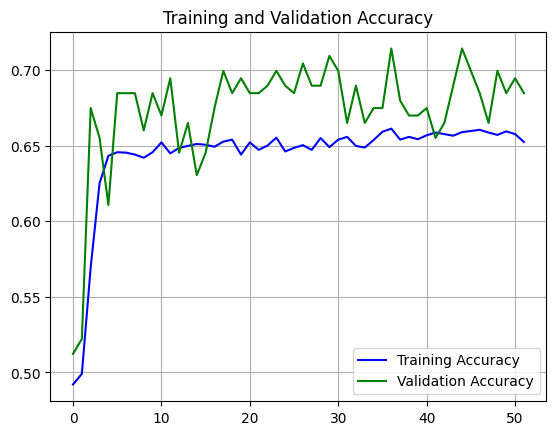

<Figure size 640x480 with 0 Axes>

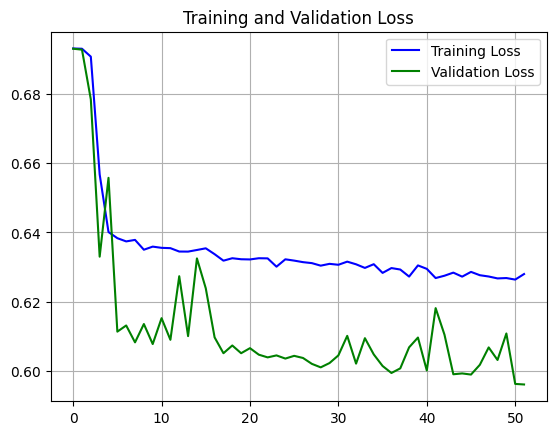

In [ ]:
import matplotlib.pyplot as plt
epochs = range(len(train_acc))
plt.plot(epochs, train_acc, 'b', label='Training Accuracy')
plt.plot(epochs, val_acc, 'g', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.grid()
plt.legend()
plt.figure()
plt.show()

plt.plot(epochs, train_loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'g', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.grid()
plt.legend()
plt.show()

In [ ]:
opt = keras.optimizers.Nadam(learning_rate=0.00001)
model.compile(optimizer=opt, loss= 'binary_crossentropy', metrics=['AUC','accuracy'])

callback = keras.callbacks.EarlyStopping(monitor='val_accuracy',patience=15)

history = model.fit(X_train, y_train, epochs=200, batch_size=8, validation_data=(X_test, y_test),callbacks=[callback])


Epoch 1/200
481/481 [==============================] - 51s 84ms/step - loss: 0.6935 - auc: 0.5012 - accuracy: 0.5027 - val_loss: 0.6914 - val_auc: 0.6049 - val_accuracy: 0.5567
Epoch 2/200
481/481 [==============================] - 39s 81ms/step - loss: 0.6776 - auc: 0.6017 - accuracy: 0.5673 - val_loss: 0.6215 - val_auc: 0.7216 - val_accuracy: 0.6700
Epoch 3/200
481/481 [==============================] - 39s 81ms/step - loss: 0.6218 - auc: 0.7140 - accuracy: 0.6563 - val_loss: 0.5796 - val_auc: 0.7828 - val_accuracy: 0.7192
Epoch 4/200
481/481 [==============================] - 39s 81ms/step - loss: 0.5820 - auc: 0.7653 - accuracy: 0.7029 - val_loss: 0.5771 - val_auc: 0.7697 - val_accuracy: 0.7094
Epoch 5/200
481/481 [==============================] - 39s 81ms/step - loss: 0.5488 - auc: 0.7987 - accuracy: 0.7285 - val_loss: 0.5514 - val_auc: 0.7947 - val_accuracy: 0.7241
Epoch 6/200
481/481 [==============================] - 39s 82ms/step - loss: 0.5086 - auc: 0.8328 - accuracy: 0.758

In [ ]:
# Directly access training history attributes
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
train_loss = history.history['loss']
val_loss = history.history['val_loss']


In [ ]:
model.save_weights('/content/drive/MyDrive/Drowsiness/weights_2.h5')

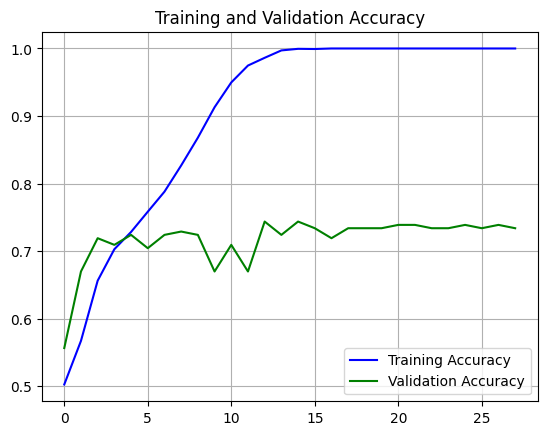

<Figure size 640x480 with 0 Axes>

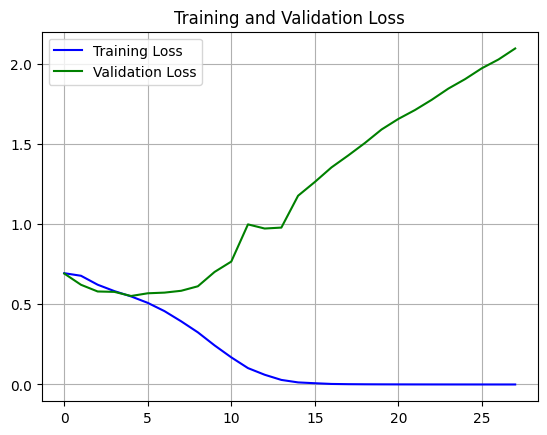

In [ ]:
import matplotlib.pyplot as plt
epochs = range(len(train_acc))
plt.plot(epochs, train_acc, 'b', label='Training Accuracy')
plt.plot(epochs, val_acc, 'g', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.grid()
plt.legend()
plt.figure()
plt.show()

plt.plot(epochs, train_loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'g', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.grid()
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import classification_report

y_true = np.argmax(y_test,axis=1)
y_pred = model.predict(X_test)
target_names = ['drowsy', 'awake']
print(classification_report(y_true, np.argmax(y_pred,axis=1), target_names=target_names))


7/7 [==============================] - 0s 33ms/step
              precision    recall  f1-score   support

      drowsy       0.73      0.72      0.72        99
       awake       0.74      0.75      0.74       104

    accuracy                           0.73       203
   macro avg       0.73      0.73      0.73       203
weighted avg       0.73      0.73      0.73       203



In [ ]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_true, np.argmax(y_pred,axis=1))

array([[71, 28],
       [26, 78]])

In [ ]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

predictions = model.predict(X_test)
y_pred = np.argmax(predictions,axis=1)
cm = confusion_matrix(y_true, y_pred, labels=[0,1])
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=target_names)
disp.plot()
plt.show()

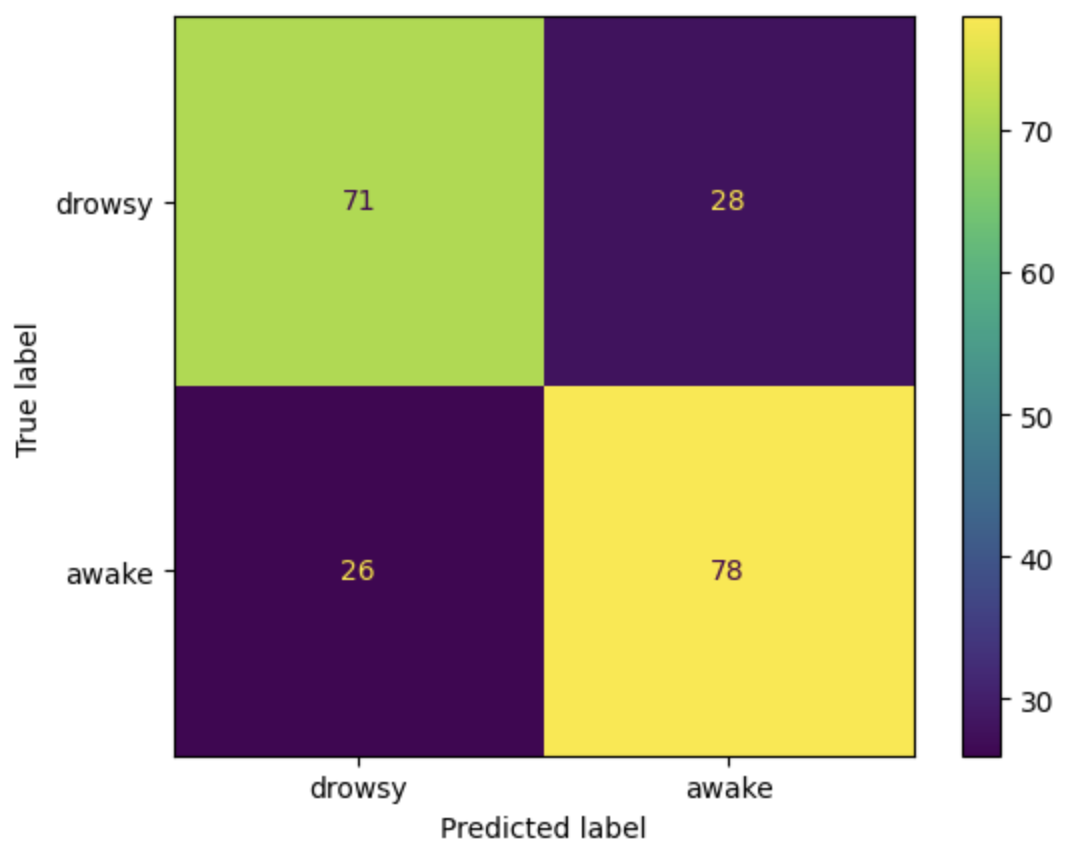